# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Firman Farel Richardo
- **Email:** farelpasaribu04@gmail.com
- **ID Dicoding:** firmanfarelrichardo

## Menentukan Pertanyaan Bisnis

- Pada musim apa penyewaan sepeda paling banyak dan paling sedikit?
- Bagaimana peningkatan penyewaan sepeda setiap hari berdasarkan musim?
- Bagaimana pengaruh jam terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Upload File Dataset

In [70]:
!pip install gdown

In [71]:
import gdown

file_id = "1sKUk-vz_ogsabGYbzrOsTQSmjAo8JrXd"
url = f"https://drive.google.com/uc?id={file_id}"
output = "day.csv"

gdown.download(url, output, quiet=False)

print("File berhasil diunduh dan siap digunakan!")

# link gdrive dataset
# https://drive.google.com/file/d/1sKUk-vz_ogsabGYbzrOsTQSmjAo8JrXd/view?usp=drive_link (day.csv)
# https://drive.google.com/file/d/15GpNWEtwwL5iPvFViKMiqTqdr5CMNSvi/view?usp=sharing (hour.csv)


Downloading...
From: https://drive.google.com/uc?id=1sKUk-vz_ogsabGYbzrOsTQSmjAo8JrXd
To: /content/day.csv
100%|██████████| 57.6k/57.6k [00:00<00:00, 48.7MB/s]

File berhasil diunduh dan siap digunakan!


In [72]:
import gdown

file_id = "15GpNWEtwwL5iPvFViKMiqTqdr5CMNSvi"
url = f"https://drive.google.com/uc?id={file_id}"
output = "hour.csv"

gdown.download(url, output, quiet=False)

print("File berhasil diunduh dan siap digunakan!")

Downloading...
From: https://drive.google.com/uc?id=15GpNWEtwwL5iPvFViKMiqTqdr5CMNSvi
To: /content/hour.csv
100%|██████████| 1.16M/1.16M [00:00<00:00, 25.2MB/s]

File berhasil diunduh dan siap digunakan!


## Data Wrangling

### Gathering Data

In [73]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [74]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Berdasarkan kode pertama yang telah dijalankan diperoleh 5 data teratas atau bagian head dari dataset day.csv
- Berdasarkan kode kedua yang telah dijalankan diperoleh 5 data teratas atau bagian head dari dataset hour.csv

### Assessing Data

In [75]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [76]:
print("Jumlah duplikasi data:", day_df.duplicated().sum())

Jumlah duplikasi data: 0


In [77]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [78]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [79]:
print("Jumlah dupilkasi: ", day_df.duplicated().sum())

Jumlah dupilkasi:  0


In [80]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Jumlah data pada day_df sudah lengkap. Namun, tipe data pada bagian dteday masih menggunakan 'object' (tipe data string), yang seharusnya menggunakan tipe data 'datetime'.
- Tidak terdapat duplikasi data pada day_df.
- Tidak terdapat kesalahan parameter statistik pada day_df.
- Jumlah data pada hour_df sudah lengkap. Namun, tipe data pada bagian dteday masih menggunakan 'object' (tipe data string), yang seharusnya menggunakan tipe data "datetime".
- Tidak terdapat duplikasi data pada hour_df.
- Tidak terdapat kesalahan parameter statistik dari hour_df.

### Cleaning Data

In [81]:
datetime_columns = ["dteday"]

for columns in datetime_columns:
    day_df[columns] = pd.to_datetime(day_df[columns])
    hour_df[columns] = pd.to_datetime(hour_df[columns])

In [82]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [83]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data pada kolom dteday telah berubah yang semula adalah object telah menjadi tipe data datetime.
- Tipe data yang diubah telah diterapkan pada kedua dataset yaitu day_df dan hour_df.

## Exploratory Data Analysis (EDA)

### Explore Data day_df


In [84]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [85]:
day_df.groupby(by="season").instant.count().sort_index(ascending=True)

,instant
season,
1,181
2,184
3,188
4,178


In [86]:
day_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


In [87]:
day_df.groupby(by=["dteday", "season"]).agg({
    "weekday": "sum",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="dteday", ascending=True)

,,weekday,casual,registered,cnt
dteday,season,,,,
2011-01-01,1,6,331,654,985
2011-01-02,1,0,131,670,801
2011-01-03,1,1,120,1229,1349
2011-01-04,1,2,108,1454,1562
2011-01-05,1,3,82,1518,1600
...,...,...,...,...,...
2012-12-27,1,4,247,1867,2114
2012-12-28,1,5,644,2451,3095
2012-12-29,1,6,159,1182,1341


In [88]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [89]:
hour_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="hr", ascending=True)

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


In [90]:
hour_df.groupby(by=["hr", "season", "weathersit"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="hr", ascending=True)

casual  registered   cnt
hr season weathersit                          
0  1      1              368        2665  3033
   4      3               47         383   430
          2              319        1932  2251
          1             1030        6260  7290
   3      2              551        1921  2472
...                      ...         ...   ...
23 1      2              226        1950  2176
          1              560        4951  5511
   4      2              538        3668  4206
   2      2              684        2735  3419
   4      3               76         542   618

[291 rows x 3 columns]

In [91]:
result = hour_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="hr", ascending=True)

# Jumlah penyewaan sepeda paling banyak pada jam tertentu
max_cnt_hour = result["cnt"].idxmax()
max_cnt_value = result["cnt"].max()

print("Jumlah penyewaan sepeda paling banyak pada jam tertentu")
print("Jam: ", max_cnt_hour)
print("Jumlah penyewaan sepeda: ", max_cnt_value)

# Jumlah penyewaan sepeda paling sedikit pada jam tertentu
lowest_cnt_hour = result["cnt"].idxmin()
lowest_cnt_value = result["cnt"].min()

print("---")
print("Jumlah penyewaan sepeda paling sedikit pada jam tertentu")
print("Jam: ", lowest_cnt_hour)
print("Jumlah penyewaan sepeda: ", lowest_cnt_value)

Jumlah penyewaan sepeda paling banyak pada jam tertentu
Jam:  17
Jumlah penyewaan sepeda:  336860
---
Jumlah penyewaan sepeda paling sedikit pada jam tertentu
Jam:  4
Jumlah penyewaan sepeda:  4428


In [92]:
from google.colab import files

all_df.to_csv("all_data.csv", index=False)

files.download("all_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Insight:**
- Penyewaan sepeda paling banyak pada musim ke 3 atau musim gugur (fall).
- Penyewaan sepeda paling sedikit pada musim ke 1 atau musim semi (spring).
- Setiap hari peningkatan penyewaan sepeda terjadi secara bervariasi berdasarkan musim.
- Jam sangat berpengaruh pada penyewaan sepeda.
- Musim dan Cuaca sangat berpengaruh pada penyewaan sepeda berdasarkan jam.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa penyewaan sepeda paling banyak dan paling sedikit?

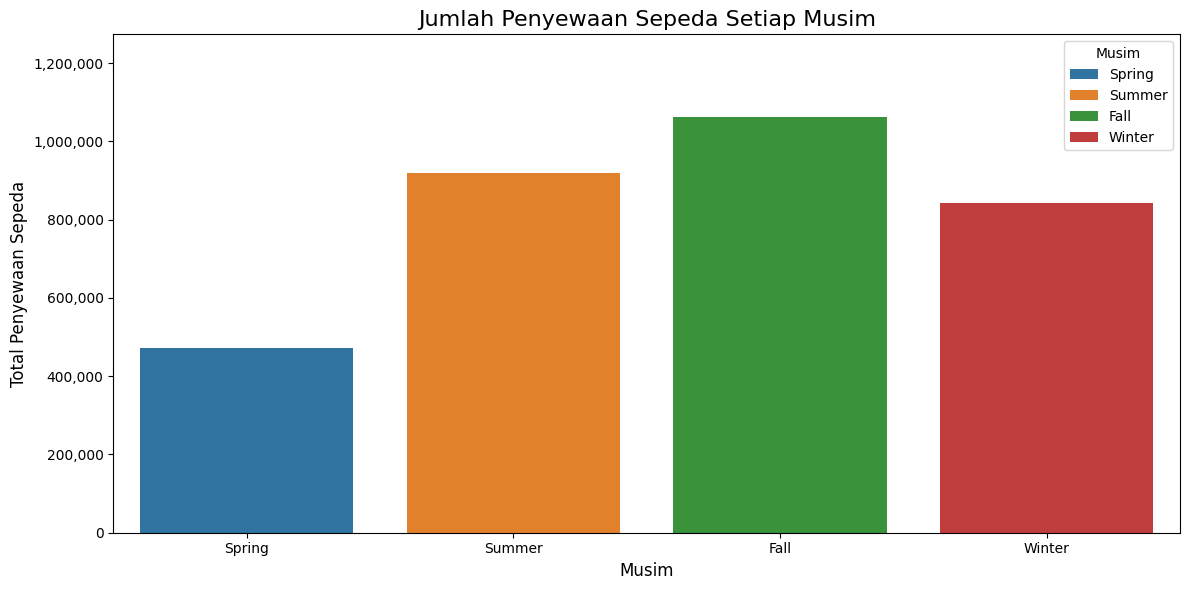

In [93]:
import matplotlib.ticker as mtick

result_season = day_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="season", ascending=True).reset_index()

season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
result_season["season_name"] = result_season["season"].map(season_mapping)

max_value = result_season["cnt"].max()

plt.figure(figsize=(12,6))
sns.barplot(x=result_season.index, y=result_season["cnt"], hue=result_season["season_name"])
plt.title("Jumlah Penyewaan Sepeda Setiap Musim", fontsize=16)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)
plt.ylim(0, max_value + max_value * 0.2)
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.legend(title="Musim")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana peningkatan penyewaan sepeda setiap hari berdasarkan musim?

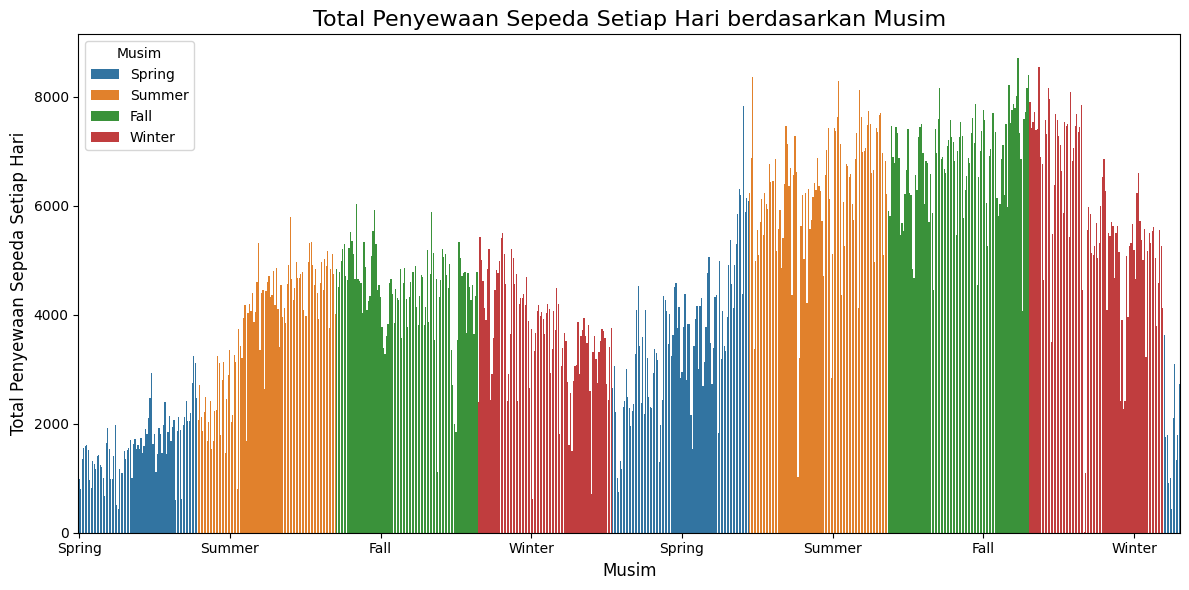

In [94]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df["season_name"] = day_df["season"].map(season_mapping)

plt.figure(figsize=(12, 6))
sns.barplot(data=day_df, x="dteday", y="cnt", hue="season_name")
plt.title("Total Penyewaan Sepeda Setiap Hari berdasarkan Musim", fontsize=16)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda Setiap Hari", fontsize=12)

xticks_interval = 100
ticks = range(0, len(day_df), xticks_interval)
labels = day_df["season_name"].iloc[ticks]
plt.xticks(ticks=ticks, labels=labels, rotation=0)

plt.legend(title="Musim")
plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana pengaruh jam terhadap penyewaan sepeda?

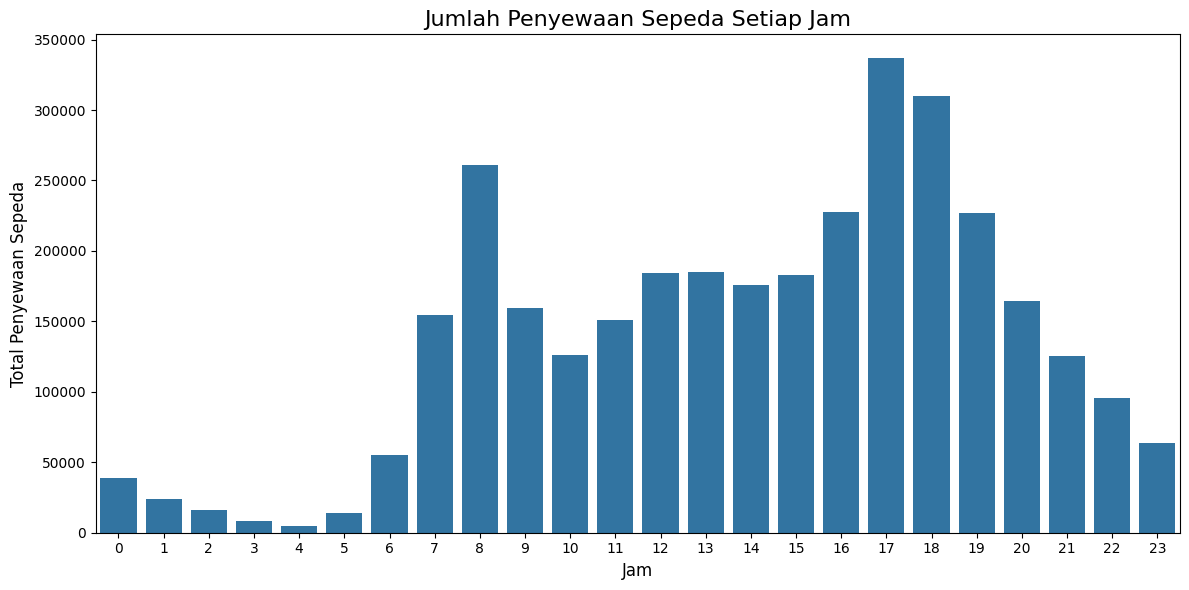

In [95]:
result = hour_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="hr", ascending=True)

plt.figure(figsize=(12,6))
sns.barplot(x=result.index, y=result["cnt"])
plt.title("Jumlah Penyewaan Sepeda Setiap Jam", fontsize=16)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)
plt.xticks(ticks=range(0,24), labels=range(0, 24), fontsize=10)
plt.tight_layout()
plt.show()

**Insight:**
- Penyewaan sepeda paling banyak berdasarkan musim dari dataset day_df diperoleh musim fall
- Penyewaan sepeda paling banyak berdasarkan musim dari dataset day_df diperoleh musim spring

## Analisis Lanjutan (Opsional)

In [96]:
rfm_df = day_df.groupby(by="instant", as_index=False).agg({
    "dteday": "max",
    "cnt": "sum"
}).sort_index(ascending=False)

rfm_df.columns = ["instant", "recency", "frequency"]

rfm_df.head()

,instant,recency,frequency
730,731,2012-12-31,2729
729,730,2012-12-30,1796
728,729,2012-12-29,1341
727,728,2012-12-28,3095
726,727,2012-12-27,2114


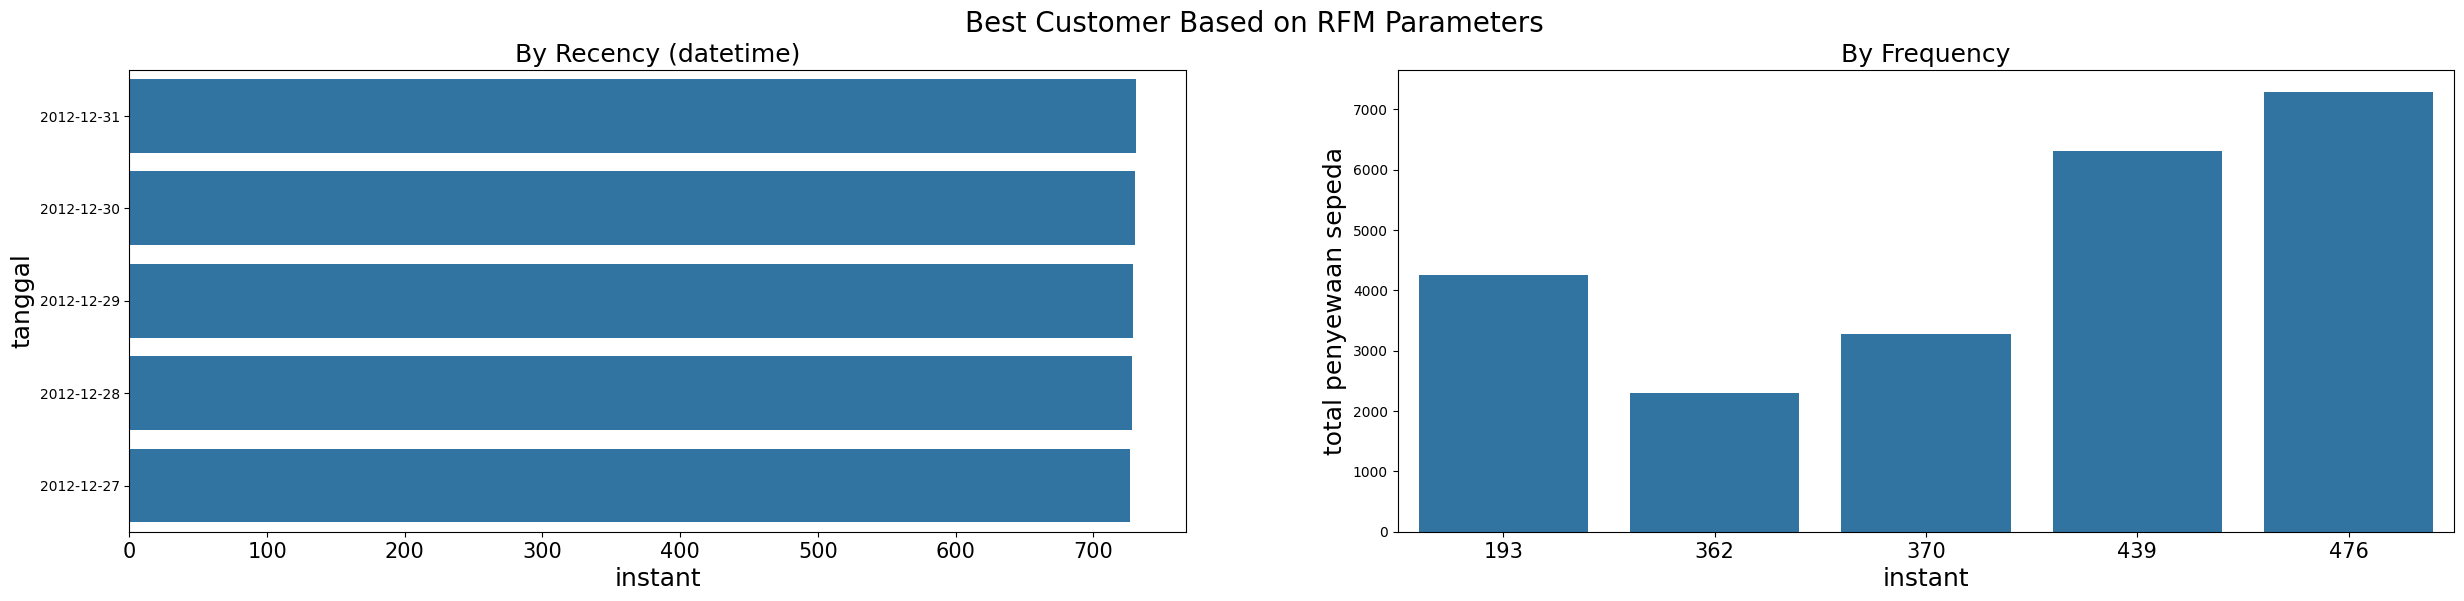

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=False).head(5), ax=ax[0])
ax[0].set_ylabel("tanggal", fontsize=18)
ax[0].set_xlabel("instant", fontsize=18)
ax[0].set_title("By Recency (datetime)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=True).sample(5), ax=ax[1])
ax[1].set_ylabel("total penyewaan sepeda", fontsize=18)
ax[1].set_xlabel("instant", fontsize=18)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1

Diperoleh kesimpulan dari visualisasi pertanyaan pertama bahwa penyewaan sepeda paling banyak terjadi pada musim ke 3 atau musim gugur (fall) yaitu sebanyak 1.061.129 penyewaan sepeda, sedangkan penyewaan sepeda paling sedikit terjadi pada musim ke 1 atau musim semi (spring) yaitu sebanyak 471.348 penyewaan sepeda. Jumlah ini diperoleh dari data yaitu selama 2 tahun dari awal tahun 2011 hingga akhir tahun 2012.

- Conclution pertanyaan 2

Diperoleh kesimpulan dari visualisasi pertanyaan kedua bahwa peningkatan penyewaan sepeda terjadi setiap hari, tetapi tidak konsisten, karena juga terjadi penurunan. Dapat diketahui juga, bahwa terjadi peningkatan penyewaan sepeda setiap berganti musim di setiap tahunnya dari tahun 2011 hingga 2012.


- Conclution pertanyaan 3

Diperoleh kesimpulan dari visualisasi pertanyaan keetiga bahwa jam penyewaan sangat berpengaruh pada intensitas atau banyak penyewaan sepeda. Berdasarkan data dan visualisasi yang diperoleh, telah didapatkan suatu informasi bahwa total penyewaan sepeda paling banyak terjadi ketika jam 17.00 sore, sedangkan total penyewaan sepeda paling sedikit terjadi ketika jam 04.00 pagi. Berdasarkan visualisasi juga diperoleh informasi bahwa ketika jam menunjukkan pukul 17.00 sore, jam berikutnya hingga besok pada jam 04.00 pagi akan terjadi penurunan total penyewaan sepeda setiap jamnya secara konsisten.

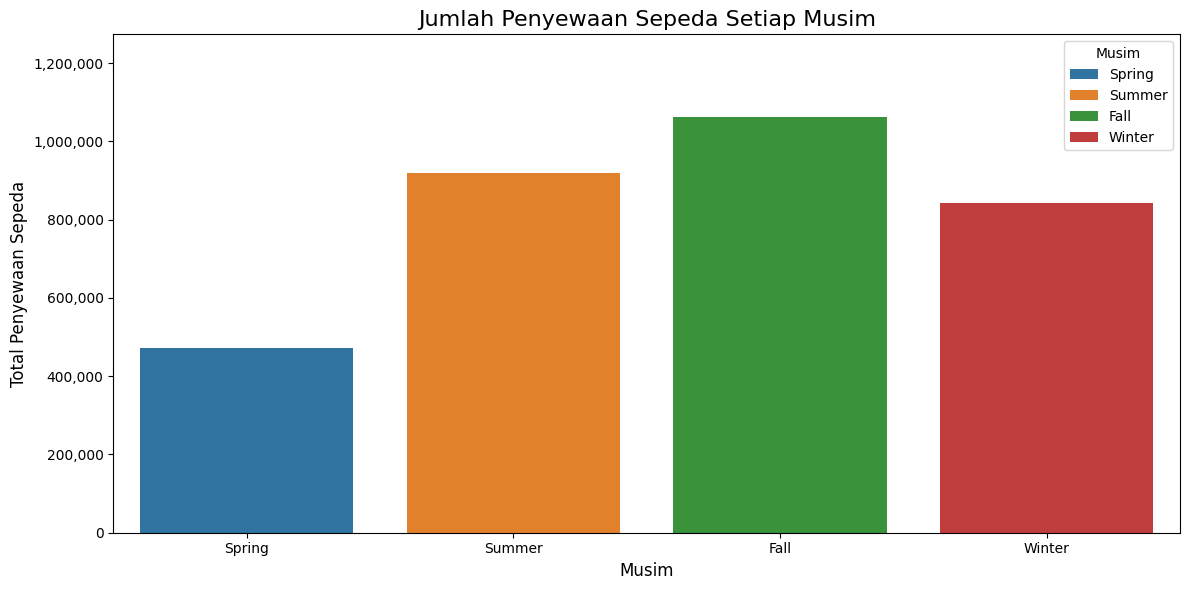

In [98]:
import matplotlib.ticker as mtick

result_season = day_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="season", ascending=True).reset_index()

season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
result_season["season_name"] = result_season["season"].map(season_mapping)

max_value = result_season["cnt"].max()

plt.figure(figsize=(12,6))
sns.barplot(x=result_season.index, y=result_season["cnt"], hue=result_season["season_name"])
plt.title("Jumlah Penyewaan Sepeda Setiap Musim", fontsize=16)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)
plt.ylim(0, max_value + max_value * 0.2)
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.legend(title="Musim")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.tight_layout()
plt.show()

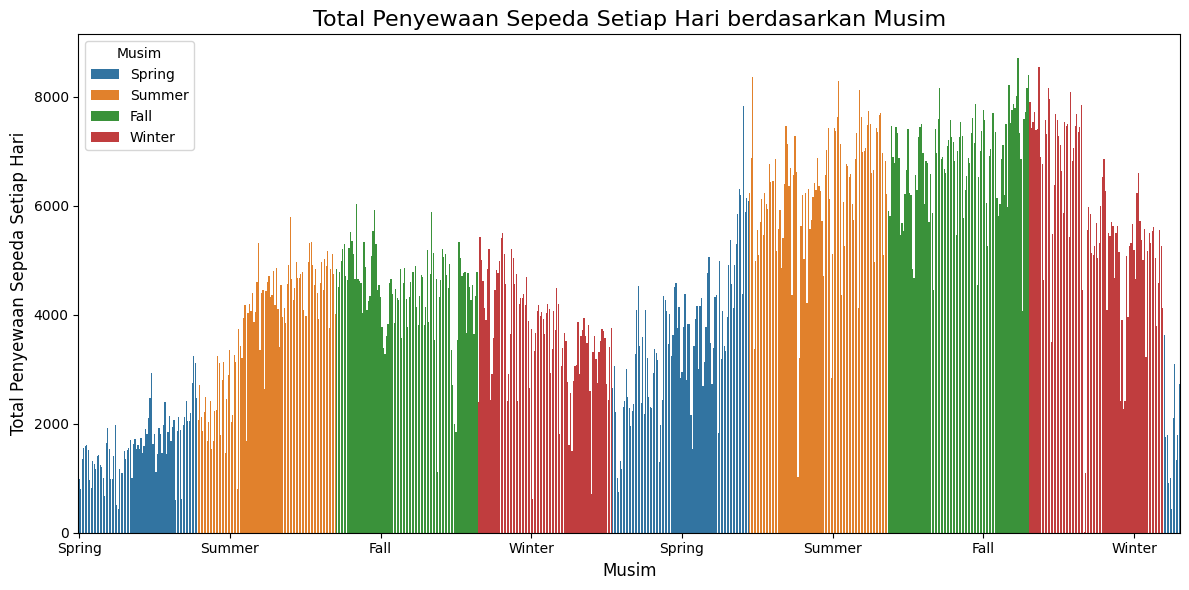

In [99]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df["season_name"] = day_df["season"].map(season_mapping)

plt.figure(figsize=(12, 6))
sns.barplot(data=day_df, x="dteday", y="cnt", hue="season_name")
plt.title("Total Penyewaan Sepeda Setiap Hari berdasarkan Musim", fontsize=16)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda Setiap Hari", fontsize=12)

xticks_interval = 100
ticks = range(0, len(day_df), xticks_interval)
labels = day_df["season_name"].iloc[ticks]
plt.xticks(ticks=ticks, labels=labels, rotation=0)

plt.legend(title="Musim")
plt.tight_layout()
plt.show()

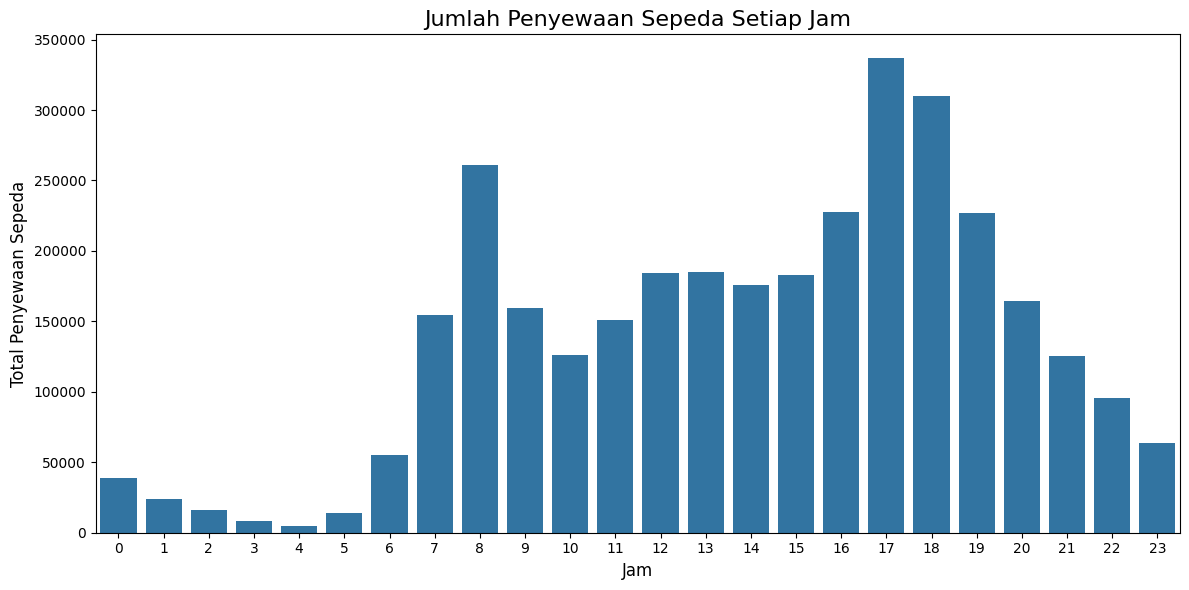

In [100]:
result = hour_df.groupby(by="hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="hr", ascending=True)

plt.figure(figsize=(12,6))
sns.barplot(x=result.index, y=result["cnt"])
plt.title("Jumlah Penyewaan Sepeda Setiap Jam", fontsize=16)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)
plt.xticks(ticks=range(0,24), labels=range(0, 24), fontsize=10)
plt.tight_layout()
plt.show()